1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [1]:
import pandas as pd

fpath = r"D:\15249\download\open_rank_20236.csv"
pdata = pd.read_csv(fpath)
print(pdata['value'].max())
print(pdata['value'].min())
print(pdata['value'].mean())
print(pdata['value'].median())

1394.45
200.68
346.9679
273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [3]:
fpath = r"D:\15249\download\activity_2022.csv"
pdata = pd.read_csv(fpath)
months = pdata.columns[1:]
rate_df = pd.DataFrame()
rate_df['repo'] = pdata['repo']
for i in range(len(months)-1):
    cur = months[i]
    nxt = months[i+1]
    rate = (pdata[nxt]-pdata[cur]) / pdata[cur].replace(0,1e-5)
    rate_df[f'month{i+1}'] = rate
print(rate_df[rate_df.columns[1:]].mean(axis=1))

0   -0.017928
1    0.000295
2   -0.022848
3   -0.003651
4    0.140824
5   -0.012404
6    0.008453
7    0.022905
8    0.013160
9   -0.003778
dtype: float64


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [4]:
fpath1 = r"D:\15249\download\china_2022.csv"
fpath2 = r"D:\15249\download\global_2022.csv"
pdata1 = pd.read_csv(fpath1)
pdata2 = pd.read_csv(fpath2)
print(f"各项数据均值的比值",pdata1[pdata1.columns[1:]].mean() / pdata2[pdata2.columns[1:]].mean())
print(f"各项数据中位数的比值",pdata1[pdata1.columns[1:]].median() / pdata2[pdata2.columns[2:]].median())
print(f"各项数据最大值的比值",pdata1[pdata1.columns[1:]].max() / pdata2[pdata2.columns[1:]].max())
print(f"各项数据最小值的比值",pdata1[pdata1.columns[1:]].min() / pdata2[pdata2.columns[1:]].min())

各项数据均值的比值 issue_comment      0.179273
open_issue         0.211759
open_pull          0.202734
review_comment     0.164940
merged_pull        0.220324
rank               1.000000
value              0.186558
rankDelta         53.000000
valueDelta         0.778119
dtype: float64
各项数据中位数的比值 issue_comment          NaN
merged_pull       0.411725
open_issue        0.318251
open_pull         0.324885
rank              1.000000
rankDelta              NaN
review_comment    0.154060
value             0.289804
valueDelta        0.695463
dtype: float64
各项数据最大值的比值 issue_comment      0.116755
open_issue         0.118387
open_pull          0.113877
review_comment     0.132412
merged_pull        0.103966
rank               1.000000
value              0.125318
rankDelta         25.000000
valueDelta         0.366607
dtype: float64
各项数据最小值的比值 issue_comment     0.149510
open_issue        0.057134
open_pull         0.066499
review_comment    0.060247
merged_pull       0.075561
rank              1.000000
val

4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

P = (25% * 85%) / (75% * 10% + 25% * 85%) = 0.739130434782608

5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

P = (35% * 50%) / (35% * 50% + 50% * 10%) = 0.777777777777777

6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

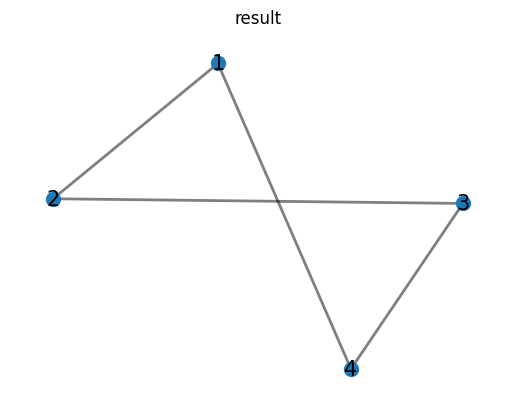

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
user = [1, 2, 3, 4]
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]
G.add_nodes_from(user)
G.add_edges_from(edge)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=15)

plt.title("result")
plt.axis('off')
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

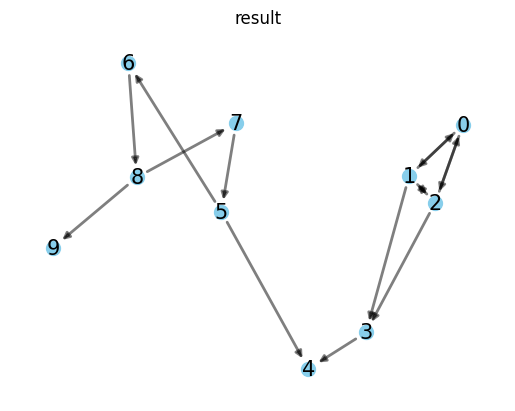

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G.add_nodes_from(users)
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=15)

plt.title("result")
plt.axis('off')
plt.show()

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

{0: 0.09499069584253748, 1: 0.10547659652084884, 2: 0.10547659652084884, 3: 0.09499069584253748, 4: 0.15931683334639937, 5: 0.1020112395832942, 6: 0.0785753675867465, 7: 0.0785753675867465, 8: 0.1020112395832942, 9: 0.0785753675867465}


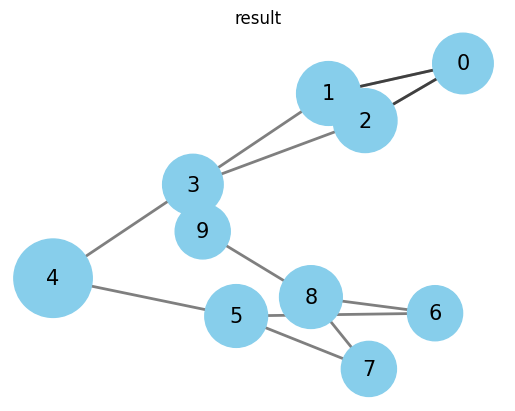

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G.add_nodes_from(users)
G.add_edges_from(edges)

pagerank = nx.pagerank(G)

nodesize = {node: rank*20000 for node, rank in pagerank.items()}
print(pagerank)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=nodesize.values(), node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=15)

plt.title("result")
plt.axis('off')
plt.show()
